In [21]:
# Import all the necessory libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt#visualization
%matplotlib inline

import seaborn as sns#visualization
import plotly.offline as py#visualization
import plotly.graph_objs as go#visualization
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

In [41]:
import pandas as pd

# Load CSV file correctly
file_path = r"C:\Users\mayow\Downloads\DAB422 CP\IMPPACT_Remote_Work_Data.csv"
data = data = pd.read_csv(file_path, na_values=[], keep_default_na=False)

In [43]:
data

,Timestamp,Have you ever worked remotely (Please exit if No),Age,Gender,Job_Role,Industry,Years_Experience,Work_Location,Hours_Per_Week,Virtual_Meetings_per_week,Work_Life_Balance,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resource,Productivity_Change_Rating,Social_Isolation_Rating,Satisfaction_Level,Company_Support_Rating,Sleep_Quality_Rating,Region
0,03/02/2025 20:05,Yes,20 - 29,Male,Hospitality,Software,7-10 years,Remote,50+,Oct-19,Two,Medium,None,Yes,Decrease,Three,Satisfied,Two,Excellent,Asia
1,06/02/2025 07:00,Yes,30 - 39,Male,Business Analyst,Legal,4-6 years,On-site,40-49,Oct-19,Five,Low,Anxiety,No,No Change,Five,Dissatisfied,One,Good,Asia
2,11/02/2025 07:12,Yes,50 - 59,Male,Designer,Self employed,4-6 years,Hybrid,20-29,20-29,Five,Low,Burnout,No,Increase,Two,Dissatisfied,Five,Poor,South America
3,17/01/2025 16:45,Yes,50 - 59,Female,Virtual Assistant,Oil & Gas,7-10 years,Hybrid,30-39,Oct-19,One,Medium,Bipolar Disorder,No,No Change,One,Very Satisfied,Two,Poor,South America
4,17/01/2025 16:00,Yes,30 - 39,Prefer not to say,CEO,Oil & Gas,More than 10 years,Remote,20-29,20-29,Five,High,None,No,Increase,One,Neutral,Two,Excellent,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10069,03/02/2025 05:53,Yes,40 - 49,Non-Binary,Data Scientist,Finance,More than 10 years,On-site,50+,20-29,Three,Medium,Depression,No,Increase,Two,Satisfied,One,Excellent,Oceania
10070,09/02/2025 19:40,Yes,40 - 49,Prefer not to say,Teacher,Oil & Gas,1-3 years,On-site,40-49,30+,Four,High,Bipolar Disorder,No,No Change,Two,Satisfied,Five,Good,North America
10071,17/01/2025 21:19,Yes,20 - 29,Prefer not to say,Technical Manager,Oil & Gas,1-3 years,Hybrid,50+,30+,One,Low,None,No,Decrease,Four,Satisfied,One,Average,Oceania
10072,12/02/2025 03:04,Yes,20 - 29,Non-Binary,Healthcare Aide,Service,7-10 years,Remote,20-29,30+,Three,High,Depression,No,Increase,One,Neutral,One,Good,South America


In [45]:
data.head()

,Timestamp,Have you ever worked remotely (Please exit if No),Age,Gender,Job_Role,Industry,Years_Experience,Work_Location,Hours_Per_Week,Virtual_Meetings_per_week,Work_Life_Balance,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resource,Productivity_Change_Rating,Social_Isolation_Rating,Satisfaction_Level,Company_Support_Rating,Sleep_Quality_Rating,Region
0,03/02/2025 20:05,Yes,20 - 29,Male,Hospitality,Software,7-10 years,Remote,50+,Oct-19,Two,Medium,None,Yes,Decrease,Three,Satisfied,Two,Excellent,Asia
1,06/02/2025 07:00,Yes,30 - 39,Male,Business Analyst,Legal,4-6 years,On-site,40-49,Oct-19,Five,Low,Anxiety,No,No Change,Five,Dissatisfied,One,Good,Asia
2,11/02/2025 07:12,Yes,50 - 59,Male,Designer,Self employed,4-6 years,Hybrid,20-29,20-29,Five,Low,Burnout,No,Increase,Two,Dissatisfied,Five,Poor,South America
3,17/01/2025 16:45,Yes,50 - 59,Female,Virtual Assistant,Oil & Gas,7-10 years,Hybrid,30-39,Oct-19,One,Medium,Bipolar Disorder,No,No Change,One,Very Satisfied,Two,Poor,South America
4,17/01/2025 16:00,Yes,30 - 39,Prefer not to say,CEO,Oil & Gas,More than 10 years,Remote,20-29,20-29,Five,High,None,No,Increase,One,Neutral,Two,Excellent,Africa


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10074 entries, 0 to 10073
Data columns (total 20 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Timestamp                                          10074 non-null  object
 1   Have you ever worked remotely (Please exit if No)  10074 non-null  object
 2   Age                                                10074 non-null  object
 3   Gender                                             10074 non-null  object
 4   Job_Role                                           10074 non-null  object
 5   Industry                                           10074 non-null  object
 6   Years_Experience                                   10074 non-null  object
 7   Work_Location                                      10074 non-null  object
 8   Hours_Per_Week                                     10074 non-null  object
 9   Virtual_Meetings_

In [49]:
data.describe()

,Timestamp,Have you ever worked remotely (Please exit if No),Age,Gender,Job_Role,Industry,Years_Experience,Work_Location,Hours_Per_Week,Virtual_Meetings_per_week,Work_Life_Balance,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resource,Productivity_Change_Rating,Social_Isolation_Rating,Satisfaction_Level,Company_Support_Rating,Sleep_Quality_Rating,Region
count,10074,10074,10074,10074,10074,10074,10074,10074,10074,10074,10074,10074,10074,10074,10074,10074,10074,10074,10074,10074
unique,9315,1,5,4,52,26,5,3,4,4,5,3,5,2,3,5,4,5,4,6
top,13/02/2025 17:30,Yes,50 - 59,Male,Administrator,Oil & Gas,Less than 1 year,Hybrid,50+,30+,Five,High,Anxiety,No,Increase,Three,Neutral,Four,Good,Europe
freq,4,10074,2046,2581,528,2538,2056,3428,2608,2555,2055,3362,2035,5129,3401,2037,2567,2060,2573,1736


In [51]:
data.columns

Index(['Timestamp', 'Have you ever worked remotely (Please exit if No)', 'Age',
       'Gender', 'Job_Role', 'Industry', 'Years_Experience', 'Work_Location',
       'Hours_Per_Week', 'Virtual_Meetings_per_week', 'Work_Life_Balance',
       'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resource', 'Productivity_Change_Rating',
       'Social_Isolation_Rating', 'Satisfaction_Level',
       'Company_Support_Rating', 'Sleep_Quality_Rating', 'Region'],
      dtype='object')

In [53]:
# Get unique values in each column
#unique_values = {col: data[col].unique() for col in data.columns}
#print(unique_values)
unique_counts = data.nunique()
unique_counts

Timestamp                                            9315
Have you ever worked remotely (Please exit if No)       1
Age                                                     5
Gender                                                  4
Job_Role                                               52
Industry                                               26
Years_Experience                                        5
Work_Location                                           3
Hours_Per_Week                                          4
Virtual_Meetings_per_week                               4
Work_Life_Balance                                       5
Stress_Level                                            3
Mental_Health_Condition                                 5
Access_to_Mental_Health_Resource                        2
Productivity_Change_Rating                              3
Social_Isolation_Rating                                 5
Satisfaction_Level                                      4
Company_Suppor

In [55]:
data.dtypes

Timestamp                                            object
Have you ever worked remotely (Please exit if No)    object
Age                                                  object
Gender                                               object
Job_Role                                             object
Industry                                             object
Years_Experience                                     object
Work_Location                                        object
Hours_Per_Week                                       object
Virtual_Meetings_per_week                            object
Work_Life_Balance                                    object
Stress_Level                                         object
Mental_Health_Condition                              object
Access_to_Mental_Health_Resource                     object
Productivity_Change_Rating                           object
Social_Isolation_Rating                              object
Satisfaction_Level                      

In [57]:
data.isnull().sum()

Timestamp                                            0
Have you ever worked remotely (Please exit if No)    0
Age                                                  0
Gender                                               0
Job_Role                                             0
Industry                                             0
Years_Experience                                     0
Work_Location                                        0
Hours_Per_Week                                       0
Virtual_Meetings_per_week                            0
Work_Life_Balance                                    0
Stress_Level                                         0
Mental_Health_Condition                              0
Access_to_Mental_Health_Resource                     0
Productivity_Change_Rating                           0
Social_Isolation_Rating                              0
Satisfaction_Level                                   0
Company_Support_Rating                               0
Sleep_Qual

In [59]:
# Replace None with 'No' and others with 'Yes' in the 'condition' column
data['Mental_Health_Condition'] = data['Mental_Health_Condition'].replace({'None': 'No'})
data['Mental_Health_Condition'] = data['Mental_Health_Condition'].apply(lambda x: 'Yes' if x != 'No' else 'No')
data['Mental_Health_Condition'] = data['Mental_Health_Condition'].replace({'Yes': 1, 'No': 0})

# Verify unique values
print(data['Mental_Health_Condition'].unique())  # Should print [1, 0]

[0 1]


In [61]:
data['Mental_Health_Condition'].unique()

array([0, 1])

In [63]:
#check if the classes (yes vs. no) are balanced
print(data['Mental_Health_Condition'].value_counts(normalize=True))  # Check proportions

Mental_Health_Condition
1    0.804546
0    0.195454
Name: proportion, dtype: float64


In [65]:
#Drop Unnecessary Features
data = data.drop('Timestamp', axis=1)
data = data.drop('Have you ever worked remotely (Please exit if No)', axis=1)
data = data.drop('Job_Role', axis=1)

In [67]:
data['Industry'].unique()

array(['Software ', 'Legal ', 'Self employed ', 'Oil & Gas', 'Education',
       'IT', 'Construction', 'Security ', 'Health', 'Retail',
       'Consulting', 'Engineering', 'Technology ', 'Human Services',
       'Supply Chain ', 'Media', 'Service ', 'Finance',
       'Hotel Operations ', 'Writing ', 'Gaming', 'Gambling Data',
       'Manufacturing', 'Government ', 'NGO', 'Publishing '], dtype=object)

In [69]:
# Remove trailing spaces from the 'category' column
data['Industry'] = data['Industry'].str.rstrip()

In [71]:
# Grouping into specific industries
industry_groups = {
    'Technology & IT': [
        'Software', 'Technology', 'IT', 'Consulting', 'Engineering'
    ],
    'Business Services': [
        'Self employed', 'Consulting', 'Finance', 'Legal', 'Retail',
        'Security', 'Publishing', 'Media'
    ],
    'Healthcare & Human Services': [
        'Health', 'Human Services', 'Government', 'NGO'
    ],
    'Manufacturing & Energy': [
        'Oil & Gas', 'Construction', 'Manufacturing', 'Engineering', 'Supply Chain'
    ],
    'Hospitality & Entertainment': [
        'Hotel Operations', 'Gaming', 'Gambling Data', 'Media'
    ],
    'Education': [
        'Education'
    ],
    'Finance': [
        'Finance'
    ],
    'Other': [
        'Writing'
    ]
}

# Function to group job sectors based on industry
def group_sectors(sector, industry_groups):
    for industry, sectors_list in industry_groups.items():
        if sector in sectors_list:
            return industry
    return 'Other'

# Apply the grouping function to create a new 'Industry' column
data['Industry'] = data['Industry'].apply(lambda x: group_sectors(x, industry_groups))

In [73]:
data['Industry'].unique()

array(['Technology & IT', 'Business Services', 'Manufacturing & Energy',
       'Education', 'Healthcare & Human Services', 'Other',
       'Hospitality & Entertainment'], dtype=object)

In [75]:
# Drop rows where the column 'Mental_Health_Condition' is 'On-site'
data = data[data['Work_Location'] != 'On-site']

In [77]:
data['Virtual_Meetings_per_week'].unique()

array(['Oct-19', '20-29', '0-9', '30+'], dtype=object)

In [79]:
data['Virtual_Meetings_per_week'] = data['Virtual_Meetings_per_week'].replace('Oct-19', '10-19')
data['Virtual_Meetings_per_week'].unique()

array(['10-19', '20-29', '0-9', '30+'], dtype=object)

In [81]:
# One-hot encode other categorical variables
data = pd.get_dummies(data, columns=['Gender', 'Industry', 'Region'], drop_first=True)

In [83]:
data['Work_Location'] = data['Work_Location'].map({'Hybrid': 0, 'Remote': 1})

In [85]:
print(data['Work_Location'].unique())

[1 0]


In [87]:
# Define mappings for ordinal features
years_experience_mapping = {
    'Less than 1 year': 0,
    '1-3 years': 1,
    '4-6 years': 2,
    '7-10 years': 3,
    'More than 10 years': 4
}

hours_mapping = {
    '20-29': 1,
    '30-39': 2,
    '40-49': 3,
    '50+': 4
}

meetings_mapping = {
    '0-9': 1,
    '10-19': 2,
    '20-29': 3,
    '30+': 4
}

stress_mapping = {
    'Low': 1,
    'Medium': 2,
    'High': 3
}

productivity_mapping = {
    'Decrease': -1,
    'No Change': 0,
    'Increase': 1
}

social_isolation_mapping = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}

satisfaction_mapping = {
    'Dissatisfied': 1,
    'Neutral': 2,
    'Satisfied': 3,
    'Very Satisfied': 4
}

company_support_mapping = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}

sleep_quality_mapping = {
    'Poor': 1,
    'Average': 2,
    'Good': 3,
    'Excellent': 4
}

mental_health_access_mapping = {
    'Yes': 1,
    'No': 0
}

work_life_balance_mapping = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}

# Apply mappings
data['Years_Experience'] = data['Years_Experience'].map(years_experience_mapping)
data['Hours_Per_Week'] = data['Hours_Per_Week'].map(hours_mapping)
data['Virtual_Meetings_per_week'] = data['Virtual_Meetings_per_week'].map(meetings_mapping)
data['Work_Life_Balance'] = data['Work_Life_Balance'].map(work_life_balance_mapping)
data['Stress_Level'] = data['Stress_Level'].map(stress_mapping)
data['Productivity_Change_Rating'] = data['Productivity_Change_Rating'].map(productivity_mapping)
data['Social_Isolation_Rating'] = data['Social_Isolation_Rating'].map(social_isolation_mapping)
data['Satisfaction_Level'] = data['Satisfaction_Level'].map(satisfaction_mapping)
data['Company_Support_Rating'] = data['Company_Support_Rating'].map(company_support_mapping)
data['Sleep_Quality_Rating'] = data['Sleep_Quality_Rating'].map(sleep_quality_mapping)
data['Access_to_Mental_Health_Resource'] = data['Access_to_Mental_Health_Resource'].map(mental_health_access_mapping)


# Encode Access_to_Mental_Health_Resource as binary
data['Access_to_Mental_Health_Resource'] = data['Access_to_Mental_Health_Resource'].map({'No': 0, 'Yes': 1})

In [89]:
# Define a mapping for label encoding
label_encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['Work_Location', 'Age',
    'Access_to_Mental_Health_Resource'
]

# Apply LabelEncoder to each column in the list
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

In [91]:
print(data['Work_Location'].unique())

[1 0]


In [93]:
data.head()

,Age,Years_Experience,Work_Location,Hours_Per_Week,Virtual_Meetings_per_week,Work_Life_Balance,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resource,Productivity_Change_Rating,...,Industry_Healthcare & Human Services,Industry_Hospitality & Entertainment,Industry_Manufacturing & Energy,Industry_Other,Industry_Technology & IT,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America
0,0,3,1,4,2,2,2,0,0,-1,...,False,False,False,False,True,True,False,False,False,False
2,3,2,0,1,3,5,1,1,0,1,...,False,False,False,False,False,False,False,False,False,True
3,3,3,0,2,2,1,2,1,0,0,...,False,False,True,False,False,False,False,False,False,True
4,1,4,1,1,3,5,3,0,0,1,...,False,False,True,False,False,False,False,False,False,False
5,3,1,1,4,2,3,2,0,0,0,...,False,False,False,False,False,False,False,False,True,False


In [100]:
#Handle Class Imbalance. Since the transformed target variable is imbalanced (Yes > No), we need to address it using: SMOTE (Synthetic Minority Over-sampling Technique) for oversampling
from imblearn.over_sampling import SMOTE

X = data.drop('Mental_Health_Condition', axis=1)
y = data['Mental_Health_Condition']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "SVM": SVC()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.7761
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      1096
           1       0.76      0.80      0.78      1088

    accuracy                           0.78      2184
   macro avg       0.78      0.78      0.78      2184
weighted avg       0.78      0.78      0.78      2184

Random Forest Accuracy: 0.8622
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1096
           1       0.83      0.90      0.87      1088

    accuracy                           0.86      2184
   macro avg       0.86      0.86      0.86      2184
weighted avg       0.86      0.86      0.86      2184

XGBoost Accuracy: 0.8384
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1096
           1       0.83      0.85      0.84      1088

    accuracy                           0.84      2184
   macro avg       0.84      0.84  

The below models predict whether an employee is likely to have a Mental Health Condition based on work-related factors:

Logistic Regression: Achieved 77.2% accuracy—a good baseline model, though it may struggle with capturing complex patterns.

Random Forest: Performed best with 85.8% accuracy, showing strong ability to distinguish employees with and without mental health conditions.

XGBoost: Achieved 83.97% accuracy, slightly lower than Random Forest but still a strong performer.

SVM: Scored 80.54% accuracy, performing well but not as strong as tree-based models.

### Key Takeaways:

Random Forest and XGBoost performed best, suggesting tree-based models are well-suited for your dataset.

If recall is important (minimizing false negatives) → Random Forest might be preferred.

If a simpler model is needed → Logistic Regression provides a reasonable baseline.

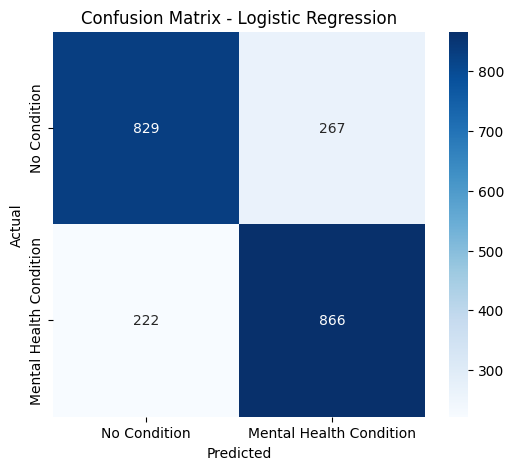

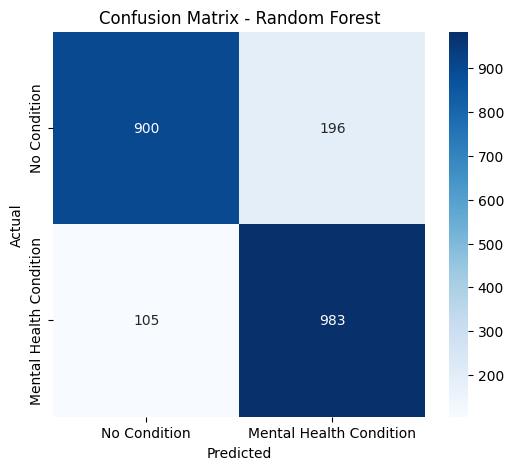

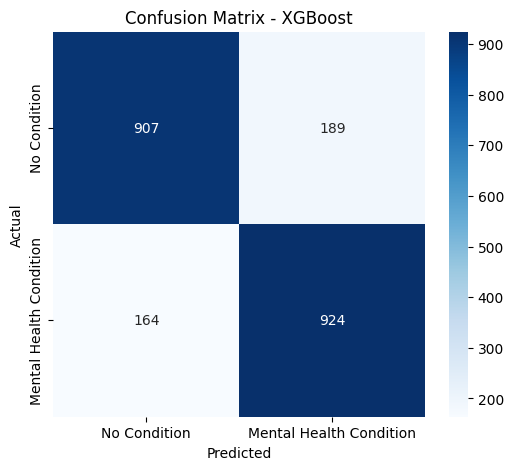

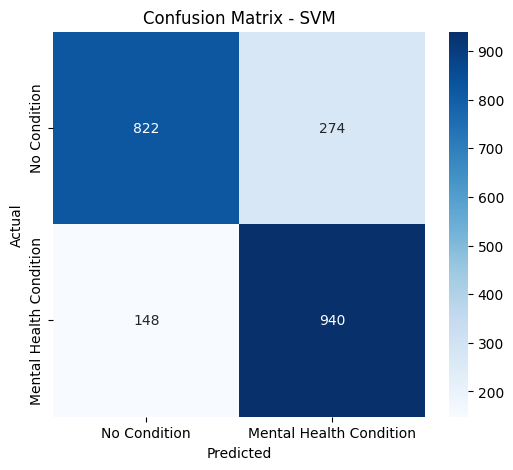

In [105]:
# plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=["No Condition", "Mental Health Condition"], 
                yticklabels=["No Condition", "Mental Health Condition"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Generate confusion matrices for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, name)


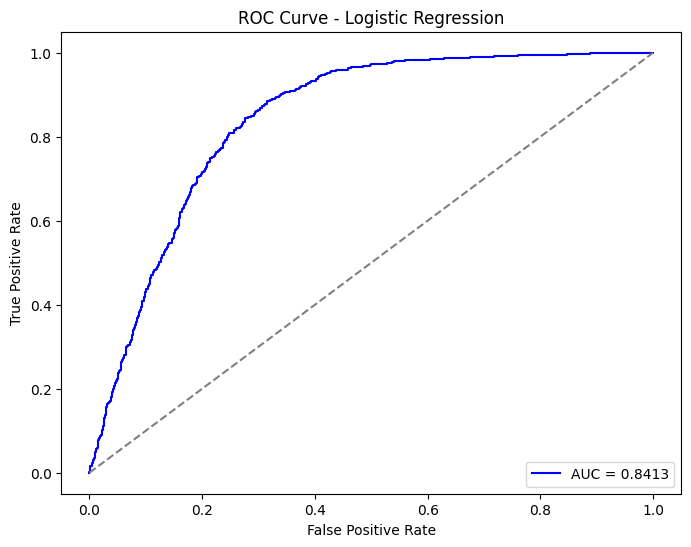

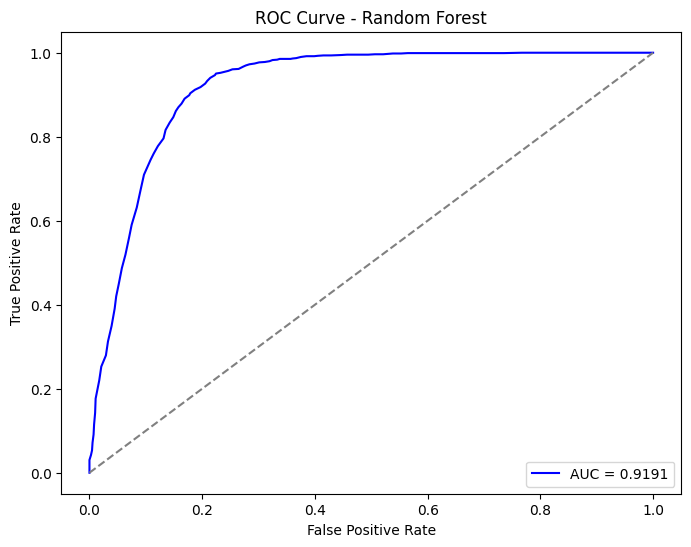

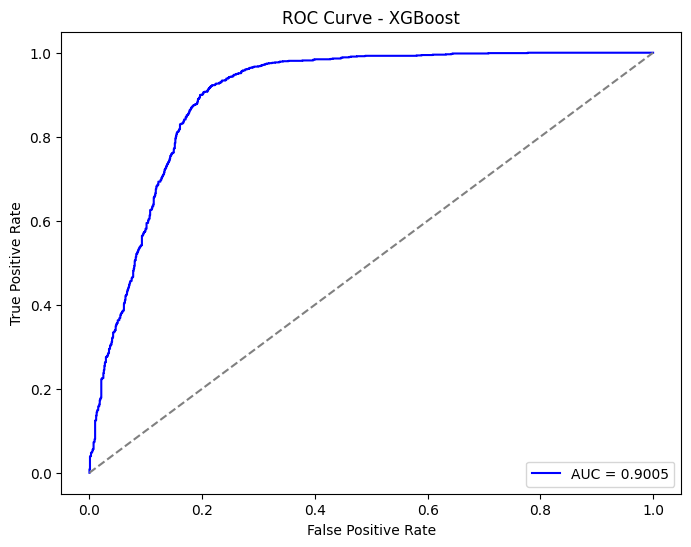

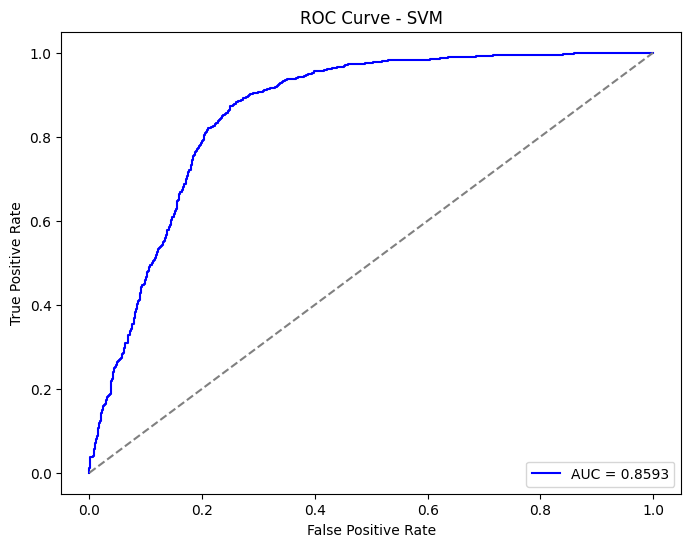

In [107]:
#ROC-AUC Score
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_scores, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.4f}")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend(loc="lower right")
    plt.show()

# Generate ROC curves for each model
for name, model in models.items():
    if name == "SVM":  # SVM does not support `predict_proba` by default
        y_scores = model.decision_function(X_test)
    else:
        y_scores = model.predict_proba(X_test)[:, 1]
    
    plot_roc_curve(y_test, y_scores, name)


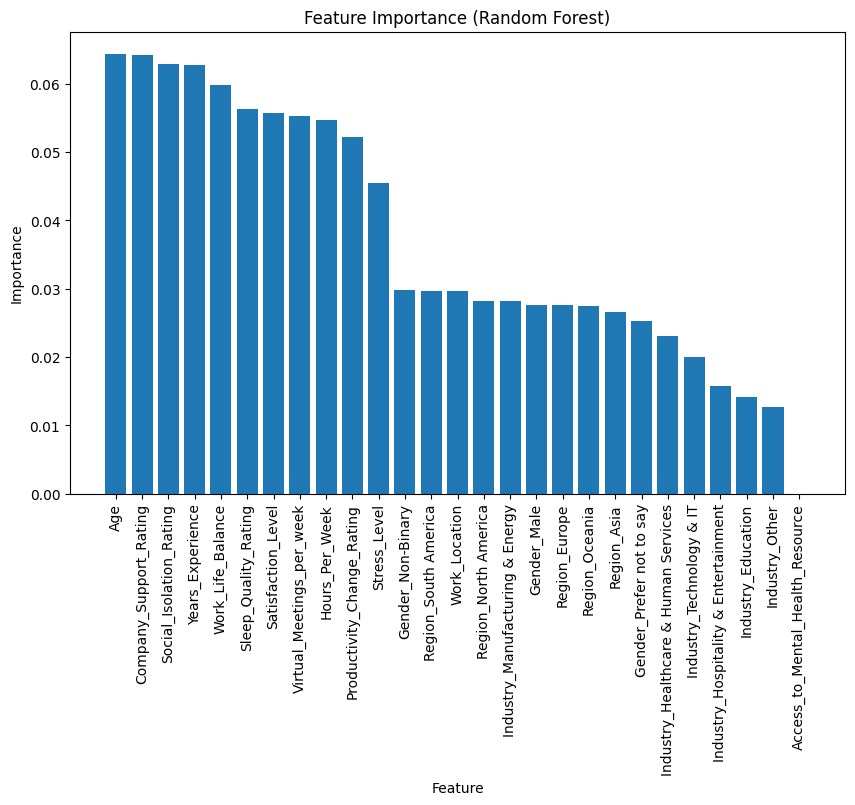

In [109]:
# Get feature importance from Random Forest
rf_model = models["Random Forest"]
feature_importance = rf_model.feature_importances_
feature_names = X_train.columns

# Plot feature importance
sorted_idx = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align="center")
plt.xticks(range(len(feature_importance)), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.show()


In [111]:
#Hyperparameter Tuning (GridSearchCV). Fine-tune the best-performing model (Random Forest or XGBoost) for better accuracy.
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)


Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best accuracy: 0.851237762526629


In [113]:
import joblib

# Save the best model (Random Forest)
best_model = grid_search.best_estimator_
joblib.dump(best_model, "mental_health_model.pkl")

# Load the model later using:
# loaded_model = joblib.load("mental_health_model.pkl")

['mental_health_model.pkl']

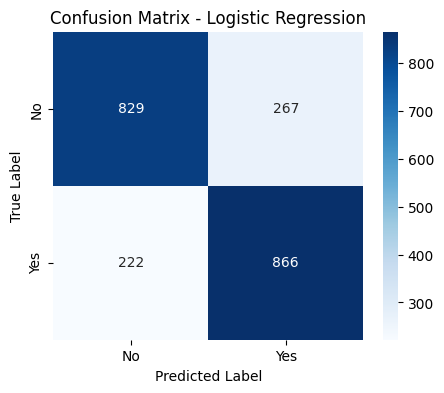

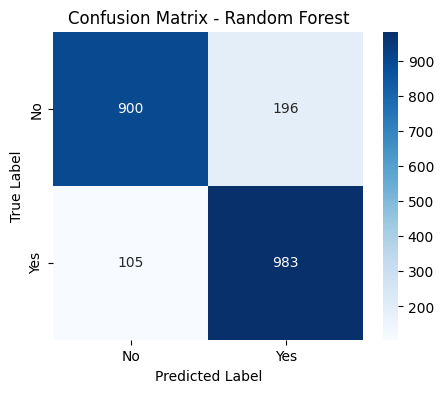

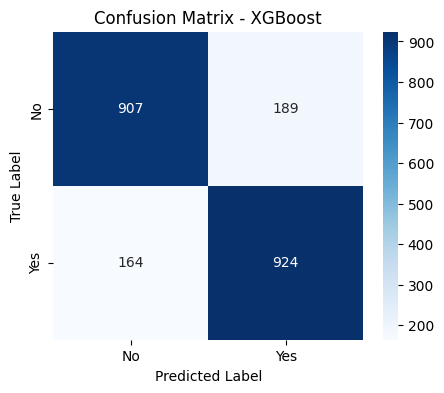

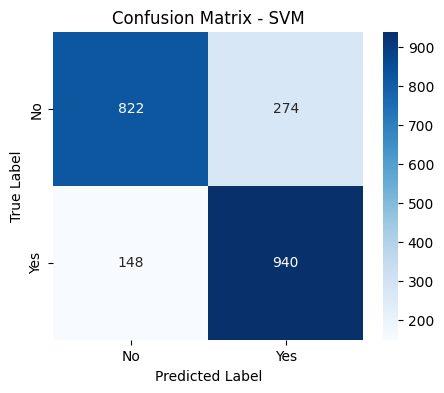

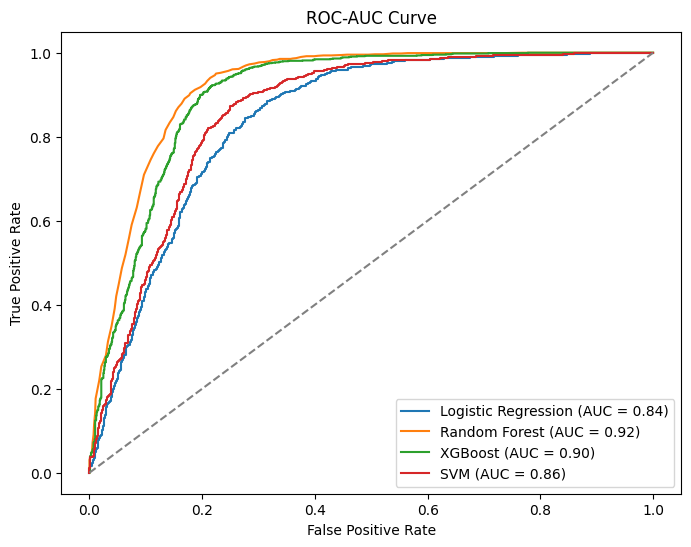

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Function to plot ROC-AUC curves
def plot_roc_auc(models, X_test, y_test):
    plt.figure(figsize=(8, 6))

    for name, model in models.items():
        if hasattr(model, "predict_proba"):  # Check if model supports probability predictions
            y_prob = model.predict_proba(X_test)[:, 1]
        else:  # For SVM, use decision_function
            y_prob = model.decision_function(X_test)
        
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC Curve')
    plt.legend()
    plt.show()

# Generate Confusion Matrix and ROC-AUC plots
for name, model in models.items():
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, name)

plot_roc_auc(models, X_test, y_test)


In [119]:
!pip install wrapt

  Obtaining dependency information for wrapt from https://files.pythonhosted.org/packages/47/f8/fb1773491a253cbc123c5d5dc15c86041f746ed30416535f2a8df1f4a392/wrapt-1.17.2-cp311-cp311-win_amd64.whl.metadata


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
tensorflow-intel 2.17.0 requires ml-dtypes<0.5.0,>=0.3.1, but you have ml-dtypes 0.5.1 which is incompatible.
tensorflow-intel 2.17.0 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 2.2.4 which is incompatible.
tensorflow-intel 2.17.0 requires tensorboard<2.18,>=2.17, but you have tensorboard 2.19.0 which is incompatible.


In [121]:
#neural network implementation
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

In [123]:
# Scale the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [125]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input Layer
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(32, activation='relu'),  # Hidden Layer
    Dropout(0.3),
    Dense(16, activation='relu'),  # Hidden Layer
    Dense(1, activation='sigmoid')  # Output Layer (binary classification)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [127]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6048 - loss: 0.6645 - val_accuracy: 0.7816 - val_loss: 0.4846
Epoch 2/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7542 - loss: 0.5239 - val_accuracy: 0.7830 - val_loss: 0.4735
Epoch 3/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7821 - loss: 0.4897 - val_accuracy: 0.7875 - val_loss: 0.4664
Epoch 4/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7767 - loss: 0.4852 - val_accuracy: 0.7885 - val_loss: 0.4649
Epoch 5/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7752 - loss: 0.4843 - val_accuracy: 0.7898 - val_loss: 0.4610
Epoch 6/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7907 - loss: 0.4744 - val_accuracy: 0.7885 - val_loss: 0.4600
Epoch 7/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7810 - loss: 0.4736 - val_accuracy: 0.7889 - val_loss: 0.4612
Epoch 8/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7868 - loss: 0.4614 - val_accuracy: 0.

In [129]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f"Neural Network Test Accuracy: {test_acc:.4f}")

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8177 - loss: 0.4321
Neural Network Test Accuracy: 0.8100


In [131]:
# Predict probabilities
y_pred_prob = model.predict(X_test_scaled)

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      1096
           1       0.78      0.86      0.82      1088

    accuracy                           0.81      2184
   macro avg       0.81      0.81      0.81      2184
weighted avg       0.81      0.81      0.81      2184



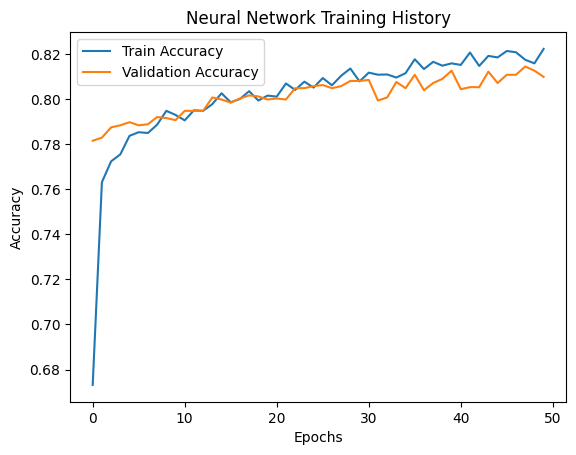

In [133]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Neural Network Training History')
plt.show()

In [135]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [137]:
import gradio as gr
import pandas as pd
import numpy as np
import joblib

# Load trained model and scaler
model = joblib.load("mental_health_model.pkl")  # Replace with your model file
scaler = joblib.load("scaler.pkl")  # Replace with your scaler file

# Expected columns from training
expected_columns = [
    'Age', 'Years_Experience', 'Work_Location', 'Hours_Per_Week', 'Virtual_Meetings_per_week',
    'Work_Life_Balance', 'Stress_Level', 'Access_to_Mental_Health_Resource', 'Productivity_Change_Rating',
    'Social_Isolation_Rating', 'Satisfaction_Level', 'Company_Support_Rating', 'Sleep_Quality_Rating',
    'Gender_Male', 'Gender_Non-Binary', 'Gender_Prefer not to say',
    'Industry_Education', 'Industry_Healthcare & Human Services', 'Industry_Hospitality & Entertainment',
    'Industry_Manufacturing & Energy', 'Industry_Other', 'Industry_Technology & IT',
    'Region_Asia', 'Region_Europe', 'Region_North America', 'Region_Oceania', 'Region_South America'
]

def predict_risk(age, years_exp, work_location, hours, meetings, work_life, stress, access, productivity,
                 isolation, satisfaction, support, sleep, gender, industry, region):
    
    input_dict = {
        'Age': [age],
        'Years_Experience': [years_exp],
        'Work_Location': [work_location],
        'Hours_Per_Week': [hours],
        'Virtual_Meetings_per_week': [meetings],
        'Work_Life_Balance': [work_life],
        'Stress_Level': [stress],
        'Access_to_Mental_Health_Resource': [access],
        'Productivity_Change_Rating': [productivity],
        'Social_Isolation_Rating': [isolation],
        'Satisfaction_Level': [satisfaction],
        'Company_Support_Rating': [support],
        'Sleep_Quality_Rating': [sleep],
    }

    input_df = pd.DataFrame(input_dict)

    # One-hot encoding for categorical features
    input_df[f'Gender_{gender}'] = 1
    input_df[f'Industry_{industry}'] = 1
    input_df[f'Region_{region}'] = 1

    # Fill missing columns with 0
    for col in expected_columns:
        if col not in input_df.columns:
            input_df[col] = 0

    input_df = input_df[expected_columns]

    # Scale and predict
    scaled_input = scaler.transform(input_df)
    prediction = model.predict(scaled_input)[0]

    return "🟠 At Risk of Mental Health Issues" if prediction == 1 else "🟢 Not at Risk"

# Gradio Interface
app = gr.Interface(
    fn=predict_risk,
    inputs=[
        gr.Number(label="Age"),
        gr.Number(label="Years of Experience"),
        gr.Number(label="Work Location (1=Remote, 2=Hybrid, 3=On-site)"),
        gr.Number(label="Hours Worked Per Week"),
        gr.Number(label="Number of Virtual Meetings Per Week"),
        gr.Slider(1, 5, label="Work-Life Balance Rating"),
        gr.Slider(1, 5, label="Stress Level"),
        gr.Radio(["0", "1"], label="Access to Mental Health Resources (0=No, 1=Yes)"),
        gr.Slider(1, 5, label="Productivity Change Rating"),
        gr.Slider(1, 5, label="Social Isolation Rating"),
        gr.Slider(1, 5, label="Satisfaction with Remote Work"),
        gr.Slider(1, 5, label="Company Support Rating"),
        gr.Slider(1, 5, label="Sleep Quality Rating"),
        gr.Radio(["Male", "Non-Binary", "Prefer not to say"], label="Gender"),
        gr.Radio([
            "Education", "Healthcare & Human Services", "Hospitality & Entertainment",
            "Manufacturing & Energy", "Other", "Technology & IT"
        ], label="Industry"),
        gr.Radio(["Asia", "Europe", "North America", "Oceania", "South America", "Africa"], label="Region")
    ],
    outputs=gr.Text(label="Mental Health Risk Prediction"),
    title="🧠 Remote Work Mental Health Risk Predictor",
    description="Enter employee info to predict their mental health risk based on remote work factors."
)

# Launch the app
app.launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [145]:
import gradio as gr
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import joblib

# Load model and scaler
model = joblib.load("your_model.pkl")
scaler = joblib.load("your_scaler.pkl")

# Define expected feature columns
expected_columns = ['Age', 'Years_Experience', 'Work_Location', 'Hours_Per_Week',
    'Virtual_Meetings_per_week', 'Work_Life_Balance', 'Stress_Level',
    'Access_to_Mental_Health_Resource', 'Productivity_Change_Rating',
    'Social_Isolation_Rating', 'Satisfaction_Level', 'Company_Support_Rating',
    'Sleep_Quality_Rating', 'Gender_Male', 'Gender_Non-Binary',
    'Gender_Prefer not to say', 'Industry_Education',
    'Industry_Healthcare & Human Services',
    'Industry_Hospitality & Entertainment', 'Industry_Manufacturing & Energy',
    'Industry_Other', 'Industry_Technology & IT', 'Region_Asia', 'Region_Europe',
    'Region_North America', 'Region_Oceania', 'Region_South America']

# Prediction + SHAP explanation
def predict_risk(*inputs):
    # Create input DataFrame
    input_df = pd.DataFrame([inputs], columns=expected_columns)

    # Scale input
    scaled_input = scaler.transform(input_df)

    # Make prediction
    pred = model.predict(scaled_input)[0]
    prediction = "High Risk" if pred == 1 else "Low Risk"

    # SHAP explanation
    explainer = shap.Explainer(model, scaler.transform(pd.DataFrame(columns=expected_columns)))
    shap_values = explainer(scaled_input)

    # Plot SHAP explanation for this individual
    shap.plots.bar(shap_values[0], show=False)
    plt.tight_layout()
    plt.savefig("shap_plot.png", bbox_inches='tight')
    plt.close()

    return prediction, "shap_plot.png"

# Inputs UI (replace with your actual Gradio input components)
input_components = [gr.Number(label=col) for col in expected_columns]

# Gradio interface
app = gr.Interface(
    fn=predict_risk,
    inputs=input_components,
    outputs=[gr.Textbox(label="Prediction"), gr.Image(label="Feature Explanation")],
    title="Mental Health Risk Prediction with SHAP"
)

app.launch(share=True)

ImportError: Numba needs NumPy 2.1 or less. Got NumPy 2.2.